In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
images = np.load("data/images.npy")

In [3]:
images.shape

(2000, 28, 28)

In [4]:
# Normalise image data between 0 and 1
images = images/np.max(images)

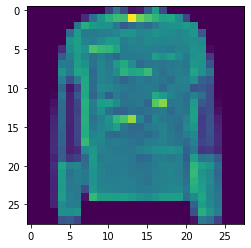

In [5]:
plt.imshow(images[700])

In [6]:
# flatten each image to a row vector
def flatten_images(images: list) -> list:
    flattened_images = []
    for image in images:
        flattened_images.append(image.flatten())
    return np.array(flattened_images)
flat_images = flatten_images(images)

<h3> Total Variance Captured </h3>

In [7]:
total_var_pca = np.zeros(9)
for i in range(1, 10):
    pca_i = PCA(n_components=i**2)
    pca_i.fit(flat_images)
    total_var_pca[i-1] = pca_i.explained_variance_ratio_.sum()

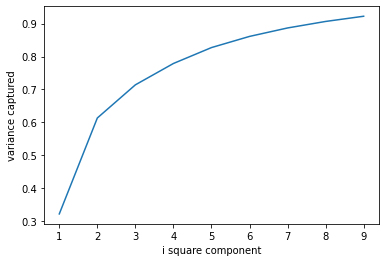

In [8]:
plt.ylabel("variance captured")
plt.xlabel("i square component")
plt.plot(np.arange(1, 10), total_var_pca)
plt.show()

In [9]:
# use PCA to achieve image reduction
pca = PCA(n_components=16, whiten=True)  # using 16 components, so we have 4x4 for each image
reduced_images = pca.fit_transform(flat_images)

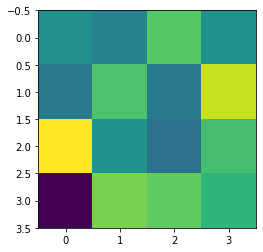

In [10]:
plt.imshow(reduced_images[10].reshape(4,4))

In [11]:
reduced_images[10]

array([-0.30856706, -0.66432543,  1.15536046, -0.22407947, -0.83931168,
        1.02554771, -0.82355775,  2.20865504,  2.73050343, -0.23184793,
       -1.05215135,  0.94147209, -3.35324015,  1.51318327,  1.25491295,
        0.63669689])

In [12]:
reduced_images.shape

(2000, 16)

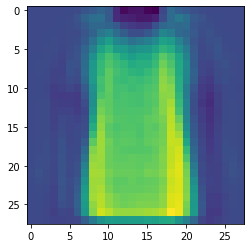

In [101]:
# map back from lower space to original space
plt.imshow(pca.inverse_transform(reduced_images).reshape(2000, 28, 28)[50])

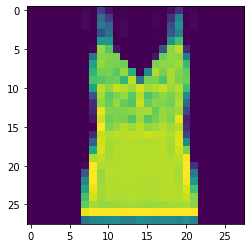

In [98]:
plt.imshow(images[50])

In [15]:
from qiskit import QuantumCircuit

In [16]:
# debugging
def __encoding(images):
    encoded_images = []
    scaler = MinMaxScaler()
    scaled_images = scaler.fit_transform(images)
    
    for image in scaled_images:
        qc = QuantumCircuit(16,16)
        # Normalise data in image (might have to save normalisation to inverse later)
        
        for i in range(len(image)):
            qc.ry(np.pi*float(image[i]), i)
        
        qc.measure(np.arange(0,16,1),np.arange(0,16,1))
        encoded_images.append(qc)
    return encoded_images, scaler

In [17]:
def _encoding(images):
    encoded_images = []
    scalers = []
    scaled_images = []
    for image in images:
        qc = QuantumCircuit(16,16)
        # Normalise data in image (might have to save normalisation to inverse later)
        
        scaler = MinMaxScaler()
        normalised = scaler.fit_transform(image.reshape(-1, 1))
        scalers.append(scaler)
        scaled_images.append(normalised.flatten())
        for i in range(len(normalised)):
            qc.ry(np.pi*float(normalised[i]), i)
        
        qc.measure(np.arange(0,16,1),np.arange(0,16,1))
        encoded_images.append(qc)
    return encoded_images, scalers, scaled_images

In [18]:
encoded_images, scalers, scaled_images = _encoding(reduced_images)

In [23]:
encoded_images[400].draw()

┌────────────┐┌─┐                                             
 q_0: ─┤ Ry(1.6931) ├┤M├─────────────────────────────────────────────
      ┌┴────────────┤└╥┘┌─┐                                          
 q_1: ┤ Ry(0.75162) ├─╫─┤M├──────────────────────────────────────────
      └┬────────────┤ ║ └╥┘┌─┐                                       
 q_2: ─┤ Ry(2.7512) ├─╫──╫─┤M├───────────────────────────────────────
      ┌┴────────────┤ ║  ║ └╥┘┌─┐                                    
 q_3: ┤ Ry(0.56939) ├─╫──╫──╫─┤M├────────────────────────────────────
      └┬────────────┤ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ─┤ Ry(1.6469) ├─╫──╫──╫──╫─┤M├─────────────────────────────────
       ├────────────┤ ║  ║  ║  ║ └╥┘┌─┐                              
 q_5: ─┤ Ry(1.7809) ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
       ├────────────┤ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_6: ─┤ Ry(2.4177) ├─╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ┌┴────────────┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q_7: ┤ Ry(0.40624) ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      └──┬───────┬──┘ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
 q_8: ───┤ Ry(π) ├────╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
       ┌─┴───────┴──┐ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
 q_9: ─┤ Ry(1.5927) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
       └─┬───────┬──┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
q_10: ───┤ Ry(0) ├────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
       ┌─┴───────┴──┐ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
q_11: ─┤ Ry(2.6875) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
      ┌┴────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
q_12: ┤ Ry(0.89702) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
      └┬────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
q_13: ─┤ Ry(2.6265) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ┌┴────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_14: ┤ Ry(0.46257) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├─────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_15: ┤ Ry(0.28001) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      └─────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 16/════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                      0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

<h3> simulating and plotting histogram </h3>

In [26]:
from qiskit.visualization import plot_histogram
from qiskit import Aer, transpile

In [27]:
len(encoded_images)

2000

In [90]:
#tmp_img.measure_all()
simulator = Aer.get_backend('aer_simulator')
#tmp_img = transpile(tmp_img, simulator)

shot_num = 10000

#index each qubit in the binary number
num = 16
decoded = []
for i in range(len(encoded_images)):
    amplist = np.zeros(16)
    tmp_img = encoded_images[i]
    result = simulator.run(tmp_img, shots=shot_num).result()
    counts = result.get_counts(tmp_img)
    keys = list(counts.keys())
    for k in range(len(keys) - 1):
            binlist = [int(d) for d in str(keys[k])]
            amplist = amplist + [x * counts[keys[k]]/shot_num for x in binlist]
             
    decoded.append(amplist)
#plot_histogram(counts, title='Bell-State counts')

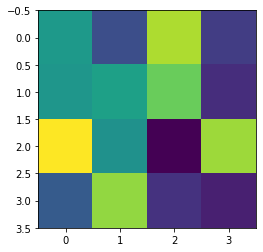

In [91]:
test_state = reduced_images[400]
scaler = MinMaxScaler()
normalised = scaler.fit_transform(test_state.reshape(-1, 1))
plt.imshow(normalised.reshape(4,4))

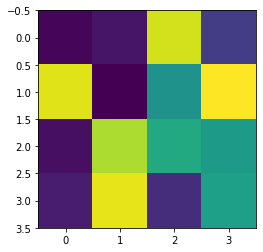

In [92]:
plt.imshow(decoded[400].reshape(4,4))

In [88]:
normalised.reshape(4,4) - decoded[400]

array([[-1.59578665e-02,  1.02049439e-01, -8.74116426e-02,
         1.01693968e-01],
       [-1.16902359e-02, -4.21206383e-02, -1.08424749e-01,
         8.79117828e-02],
       [ 5.00000000e-05, -1.03655431e-02,  0.00000000e+00,
        -9.49031235e-02],
       [ 9.82299491e-02, -9.82193968e-02,  9.13419285e-02,
         6.94305448e-02]])

In [33]:
# recover for scaling
decoded_images = [scalers[i].inverse_transform(decoded[i].reshape(-1, 1)).flatten() for i in range(len(decoded))]

In [34]:
np.array(decoded_images).shape

(2000, 16)

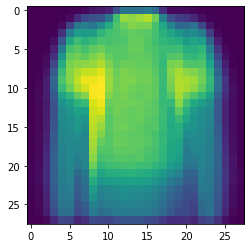

In [104]:
plt.imshow(pca.inverse_transform(decoded).reshape(2000, 28, 28)[52])

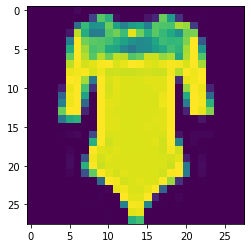

In [103]:
plt.imshow(images[52])

In [ ]:
decoded[0]

In [ ]:
decoded_images[0]

In [ ]:
keys = list(counts.keys())
range(len(keys))
[int(d) for d in str(int(keys[4]))]
amplist = np.zeros(16-1)
[int(d) for d in str(keys[4])]

<h3> Decoding </h3>